**only bound constraints, no equality constraints, full objective**

In [ ]:

import numpy as np
import mystic
from statsmodels.stats.weightstats import DescrStatsW


N = 1000
data = np.linspace(1,N,N)


def objective(x, d=data, alpha=0.1):
    x = np.squeeze(x)
    return -1*DescrStatsW(d, x).quantile(1-alpha).to_numpy()[0]



bounds = [(1,3) for i in range(0,len(data))]

def penalty(x):
  return 0.0

from mystic.solvers import diffev2
from mystic.monitors import VerboseMonitor
mon = VerboseMonitor(10)

result = diffev2(objective, x0=bounds, penalty=penalty, npop=10, gtol=200, bounds=bounds,\
                 disp=False, full_output=True,  maxiter=1000)
print(result[0])
print(-result[1])
print(-objective([1]*(N-1)+[3], d=data, alpha=0.1))

**only bound constraints, no equality constraints, simple objective**

In [276]:

from scipy.optimize import Bounds
from scipy.optimize import minimize

N = 300
K = 20
data = np.linspace(1,N,N)
bounds = Bounds([1]*N, [3]*N)

def objective(x, K=K): # inverted objective, to find the max
    return -1*np.sum(x[-K:])/np.sum(x)

x0 = np.array([2]*N)

res = minimize(objective, x0, method='SLSQP',  options={'verbose': 1, 'maxiter': 5000}, bounds=bounds)

print(res.x)
print(-res.fun)
print(-objective([1]*(N-K)+[3]*K))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
0.17647058823529413
0.17647058823529413


**bound constraints + equality constraints, simple objective**

In [11]:

from scipy.optimize import Bounds
from scipy.optimize import minimize

N = 300
K = 5
data = np.linspace(1,N,N)
bounds = Bounds([1]*N, [3]*N)


def objective(x, K=K): 
    return -1*np.sum(x[-K:])/np.sum(x)

coef = np.random.normal(0,0.2,N)

def con(x, coef=coef):
    return np.sum(coef*x)-3
eq_cons = {'type': 'eq', 'fun' : con}

print('min', con((coef>0)*1 + (coef<0)*3), 'max', con((coef>0)*3 + (coef<0)*1))

def incon(x, coef=coef):
    return  np.array([1 - np.sum(coef*x), 1+np.sum(coef*x)])
ineq_cons = {'type': 'ineq', 'fun' : incon}


x0 = np.random.uniform(1,3,N)
x0 = np.ones(N)
x0 = np.array([1]*(N-K)+[3]*K)
res = minimize(objective, x0, method='SLSQP', tol=1e-5, options={'ftol': 1e-5, 'disp': True, 'maxiter': 5000}, \
    bounds=bounds, constraints=eq_cons)

print(res.x)
print(-res.fun)
print(-objective([1]*(N-K)+[3]*K))
print(np.sum(coef*res.x))
print(res.message)

min -35.30919436145439 max 56.471674285416846
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.04567508179298117
            Iterations: 9
            Function evaluations: 2709
            Gradient evaluations: 9
[1.23252003 1.06070645 1.07628363 1.32511742 1.07494364 1.
 1.17630862 1.         1.09360513 1.         1.25559395 1.
 1.         1.         1.14364267 1.         1.16062554 1.16636634
 1.08435857 1.01825515 1.         1.24886286 1.         1.15760431
 1.         1.18612817 1.13714455 1.         1.00885265 1.19700526
 1.07164876 1.         1.         1.         1.         1.
 1.         1.         1.         1.13743753 1.10557896 1.
 1.00082531 1.21876677 1.01205069 1.05144613 1.         1.14328386
 1.15754166 1.03561513 1.         1.         1.39528607 1.22234669
 1.20793875 1.         1.27012057 1.03186159 1.         1.
 1.15060189 1.         1.         1.         1.19162878 1.
 1.06096916 1.         1.         1.         1.      

In [271]:
# reuse the optima as initialization reduces computation time
x0 = res.x
bounds = Bounds([1]*(N-1)+[1.4], [3]*(N-1)+[2.6])
res2 = minimize(objective, x0, method='SLSQP', tol=1e-9, options={'ftol': 1e-9, 'disp': True, 'maxiter': 5000}, \
    bounds=bounds, constraints=ineq_cons)
print(res2.x)
print(-res2.fun)
print(np.sum(coef*res2.x))
print(res2.message)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.04682282041696795
            Iterations: 25
            Function evaluations: 7525
            Gradient evaluations: 25
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.36370604 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.     

In [272]:
K = 20
def objective(x, K=K): 
    return -1*np.sum(x[-K:])/np.sum(x)
x0 = res.x
bounds = Bounds([1]*N, [3]*N)
res3 = minimize(objective, x0, method='SLSQP', tol=1e-9, options={'ftol': 1e-9, 'disp': True, 'maxiter': 5000}, \
    bounds=bounds, constraints=ineq_cons)
print(res3.x)
print(-res3.fun)
print(np.sum(coef*res3.x))
print(res3.message)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.17581619327556547
            Iterations: 57
            Function evaluations: 17157
            Gradient evaluations: 57
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.    

In [ ]:


N = 100
data = np.linspace(1,N,N)
bounds = Bounds([1]*N, [3]*N)

r = []
r2 = []
Ks = np.arange(1,N-1)
coef = np.random.normal(0,0.2,N)

for K in Ks:
    def objective(x, K=K): 
        return -1*np.sum(x[-K:])/np.sum(x)


    def con(x, coef=coef):
        return np.sum(coef*x)
    eq_cons = {'type': 'eq', 'fun' : con}

    def incon(x, coef=coef):
        return  np.array([1 - np.sum(coef*x), 1+np.sum(coef*x)])
    ineq_cons = {'type': 'ineq', 'fun' : incon}


    x0 = np.random.uniform(1,3,N)
    res = minimize(objective, x0, method='SLSQP', tol=1e-9, options={'ftol': 1e-9, 'disp': True, 'maxiter': 5000}, \
        bounds=bounds, constraints=eq_cons)
    print(res.message, np.sum(coef*res.x))

    r.append(-res.fun)
    r2.append(-objective([1]*(N-K)+[3]*K))


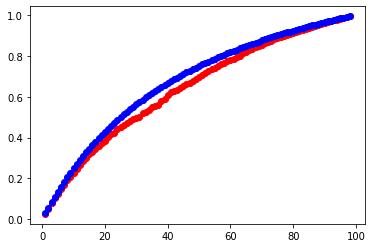

In [264]:
import matplotlib.pyplot as plt
plt.plot(Ks, r, 'ro-')
plt.plot(Ks, r2, 'bo-')


In [274]:
np.log(100)

4.605170185988092

<AxesSubplot:>

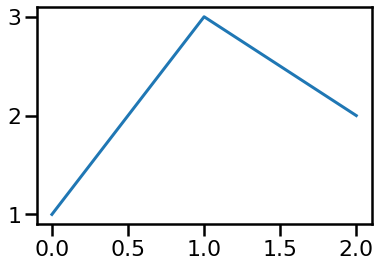

In [3]:
import seaborn as sns
sns.set_context("poster")
sns.lineplot(x=[0, 1, 2], y=[1, 3, 2])